In [30]:
import pandas as pd
import numpy as np
from sklearn import linear_model 
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline 

In [156]:
df = pd.read_csv("Immunotherapy.csv", na_values = '?')

In [157]:
df1 = df.dropna(axis = 1)

In [158]:
df2 = df1.values 

In [159]:
df2.shape

(90, 8)

In [160]:
X = df2[: , 0:7]
Y = df2[:,7]


In [161]:
Y.shape

(90,)

In [162]:
X_train = X[0 : 60, :]
Y_train = Y[0:60]
X_test = X[60: , :]
Y_test = Y[60:]

In [163]:
Y_train.shape

(60,)

In [164]:
acc_train_logreg = []

In [165]:
acc_test_logreg = []

In [166]:
c_logreg = []

In [167]:
def logreg_model(c , X_train , Y_train , X_test, Y_test):
    logreg = linear_model.LogisticRegression(penalty = 'L1', C = c , solver = 'saga')
    
    logreg.fit(X_train, Y_train)
    
    print(X_train.shape)
    
    Yhat_train = logreg.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    c_logreg.append(c)


In [174]:
logreg_model(100, X_train, Y_train, X_test, Y_test)

(60, 7)
Accuracy on training data = 0.800000
Accuracy on test data = 0.766667


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [175]:
acc_train_logreg

[0.80000000000000004,
 0.80000000000000004,
 0.80000000000000004,
 0.80000000000000004,
 0.80000000000000004,
 0.80000000000000004,
 0.80000000000000004]

In [176]:
acc_test_logreg

[0.76666666666666672,
 0.76666666666666672,
 0.76666666666666672,
 0.76666666666666672,
 0.76666666666666672,
 0.76666666666666672,
 0.76666666666666672]

In [57]:
c_logreg

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

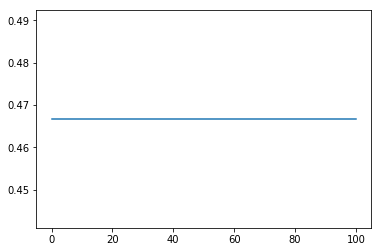

In [58]:
plt.plot(c_logreg, acc_train_logreg)

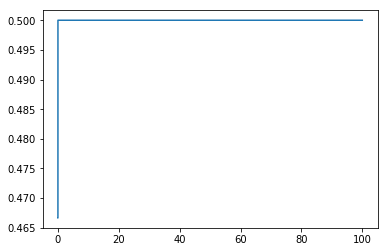

In [59]:
plt.plot(c_logreg , acc_test_logreg )

# Logistic Regression with L-2 :

In [177]:
acc_train_logreg2 = []

In [178]:
acc_test_logreg2 = []

In [179]:
c_logreg2 = []

In [180]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    logreg2 = linear_model.LogisticRegression(C=c)
    
    logreg2.fit(X_train, Y_train)
    
    
    Yhat_train = logreg2.predict(X_train)
    acc_train= np.mean(Yhat_train == Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg2.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on training data = %f" % acc_test)
    
    c_logreg2.append(c)

In [188]:
logreg2_model(100, X_train, Y_train, X_test, Y_test)

Accuracy on training data = 0.833333
Accuracy on training data = 0.833333


In [190]:
print(acc_test_logreg2)

[0.76666666666666672, 0.76666666666666672, 0.76666666666666672, 0.76666666666666672, 0.80000000000000004, 0.83333333333333337, 0.83333333333333337]


In [ ]:
plt.plot(c_logreg2 , acc_train_logreg2 )

In [ ]:
plt.plot(c_logreg2, acc_test_logreg2)

# Logistic Regression with Polynomial Transformation
Refer the given link to know how we can transform features.<br>
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [191]:
from sklearn.preprocessing import PolynomialFeatures

In [192]:
poly = PolynomialFeatures(2)

In [193]:
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

In [194]:
X_transformed_train.shape

(60, 36)

In [195]:
# Calling logreg_model with transformed features.
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []

In [202]:
logreg_model(100, X_transformed_train, Y_train, X_transformed_test, Y_test)

(60, 36)
Accuracy on training data = 0.800000
Accuracy on test data = 0.766667


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [204]:
print(acc_test_logreg )

[0.76666666666666672, 0.76666666666666672, 0.76666666666666672, 0.76666666666666672, 0.76666666666666672, 0.76666666666666672, 0.76666666666666672]


In [207]:
# Calling logreg_model2 with transformed features.
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []

In [214]:
logreg2_model(100, X_transformed_train, Y_train, X_transformed_test, Y_test)

Accuracy on training data = 0.900000
Accuracy on training data = 0.700000


In [216]:
print(acc_test_logreg2)

[0.6333333333333333, 0.6333333333333333, 0.66666666666666663, 0.69999999999999996, 0.69999999999999996, 0.69999999999999996, 0.69999999999999996]


In [ ]:
plt.plot(c_logreg2, acc_test_logreg2 )

# SVM Linear

In [217]:
acc_train_svm_linear = []

In [218]:
acc_test_svm_linear = []

In [219]:
c_svm_linear = []

In [220]:
def svm_linear(c):
    svc = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    svc.fit(X_train,Y_train)
    
    Yhat_svc_train = svc.predict(X_train)
    acc_train = np.mean(Yhat_svc_train == Y_train)
    acc_train_svm_linear.append(acc_train)
    print('Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_test = svc.predict(X_test)
    acc_test = np.mean(Yhat_svc_test == Y_test)
    acc_test_svm_linear.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))
    
    c_svm_linear.append(c)
        

In [227]:
svm_linear(100)

Accuracy = 0.833333
Accuracy = 0.833333


In [229]:
print(acc_test_svm_linear)

[0.76666666666666672, 0.76666666666666672, 0.76666666666666672, 0.80000000000000004, 0.83333333333333337, 0.83333333333333337, 0.83333333333333337]


In [ ]:
plt.plot(c_svm_linear , acc_train_svm_linear )


In [ ]:
plt.plot(c_svm_linear , acc_test_svm_linear )

# RBF

In [230]:
def svm_rbf(c , g):
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c ,gamma = g )
    
    svc_rbf.fit(X_train, Y_train)
    
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc_train_rbf = np.mean(Yhat_svc_rbf_train == Y_train)
    print('Train Accuracy = {0:f}'.format(acc_train_rbf))
    
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc_test_rbf = np.mean(Yhat_svc_rbf_test == Y_test)
    print('Test Accuracy = {0:f}'.format(acc_test_rbf))

In [256]:
svm_rbf(10,1)

Train Accuracy = 1.000000
Test Accuracy = 0.766667


# Polynomial

In [137]:
svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = 2.8, degree = 2 )

In [ ]:
A = X_train[0:200,:]
B = Y_train[0:200]
C = X_test[0:100,:]
D = Y_test[0:100]

In [ ]:
svc_polynomial.fit(A, B)

In [ ]:
Yhat_svc_polynomial_train = svc_polynomial.predict(A)
acc = np.mean(Yhat_svc_polynomial_train == B)
print('Accuracy = {0:f}'.format(acc))

In [ ]:
Yhat_svc_polynomial_test = svc_polynomial.predict(C)
acc = np.mean(Yhat_svc_polynomial_test == D)
print('Accuracy = {0:f}'.format(acc))

In [257]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

In [258]:
def svm_polynomial(c):
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c, degree = 2 )
    A = X_train[0:200,:]
    B = Y_train[0:200]
    C = X_test[0:100,:]
    D = Y_test[0:100]
    
    svc_polynomial.fit(A, B)
    
    Yhat_svc_polynomial_train = svc_polynomial.predict(A)
    acc_train = np.mean(Yhat_svc_polynomial_train == B)
    acc_train_svm_poly.append(acc_train)
    print('Training Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_polynomial_test = svc_polynomial.predict(C)
    acc_test = np.mean(Yhat_svc_polynomial_test == D)
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_poly.append(c)
    

In [265]:
svm_polynomial(100)

Training Accuracy = 0.866667
Test Accuracy = 0.700000


In [267]:
print(acc_test_svm_poly)

[0.76666666666666672, 0.69999999999999996, 0.66666666666666663, 0.69999999999999996, 0.59999999999999998, 0.66666666666666663, 0.69999999999999996]


In [ ]:
plt.plot(c_svm_poly , acc_train_svm_poly )